<div style="font-family: Arial, sans-serif;">
    <h1 style="text-align: center; color: #FFFFFF;"></i>E-Commerce Sales Revenue Forecasting</h1>
    <br>
    <h2>🏪Business Problem</h2>
    <p>Dalam melakukan perencanaan bisnis dan pengambilan keputusan, sangatlah penting untuk memperkirakan pendapatan penjualan dari e-commerce tersebut. Melalui prediksi pendapatan penjualan, e-commerce dapat mengidentifikasi potensi dan kendala dalam proses bisnis, meningkatkan strategi penjualan, serta mengetahui tren penjualan dari setiap kategori produk. Studi ini bertujuan untuk memprediksi pendapatan penjualan atau <i>sales revenue</i> dari masing-masing master kategori produk menggunakan teknik analisis <i>time series</i> dengan memanfaatkan dataset yang mencatat transaksi pelanggan serta data produk dalam e-commerce tersebut mulai bulan Juli 2016 hingga Juli 2022.</p>
    <br>
    <h2>📊Dataset Story</h2>

  *   **Dataset Origin**: Terdiri dari 2 dataset yaitu *transactions* dan *product* yang dimulai dari bulan Juli 2016 hingga Juli 2022.
  *   **Tujuan**: Memprediksi pendapatan penjualan (*sales revenue*) dari masing-masing kategori produk supaya e-commerce dapat melakukan perencanaan bisnis dan pengambilan keputusan dengan tepat.


</div>

**Nama Anggota Kelompok** :


1.   Muhammad Ilam Pradipta
2.   Nada Salsabilla
3.   Fitria Rahmadani
4.   Nurul Jumnatha Nofitasari
5.   Anjar Ayuning Lestari
6.   Amos Hatoguan Sihombing

**Software yang digunakan :**


*   Google Collaboratory
*   Tableau





# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import itertools
from ast import literal_eval
from scipy import stats
from datetime import datetime
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df_transaksi = pd.read_csv('/content/drive/MyDrive/INFO_GAIA/Dataset/transactions.csv')
df_prd = pd.read_csv('/content/drive/MyDrive/INFO_GAIA/Dataset/product.csv', sep=';')

Mounted at /content/drive


# Data Preparation

## Product

In [ ]:
df_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_prd.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
# pd.set_option('display.max_rows', None)
df_prd[df_prd.isna().any(axis=1)]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
282,5402,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011.0,Sports,Kalenji Ekiden 200 Wn Purple 2011
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
...,...,...,...,...,...,...,...,...,...,...
43655,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44101,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44246,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44249,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [ ]:
df_prd['baseColour'].value_counts()

Black                9732
White                5540
Blue                 4922
Brown                3494
Grey                 2741
Red                  2458
Green                2116
Pink                 1861
Navy Blue            1791
Purple               1643
Silver               1090
Yellow                779
Beige                 749
Gold                  629
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

In [ ]:
df_prd[df_prd['baseColour'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6207,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9521,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12773,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15539,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15721,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17281,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20222,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [ ]:
# handling missing values

# kondisi untuk 'productDisplayName' yang mengandung 'Wrangler Men Blue'
condition1 = df_prd['productDisplayName'].str.contains('Wrangler Men Blue', case=False, na=False)
condition2 = df_prd['productDisplayName'].str.contains('Wrangler Men Black', case=False, na=False)

# Mengganti nilai 'baseColour' dengan 'Blue' pada baris-baris yang memenuhi kondisi
df_prd.loc[condition1, 'baseColour'] = 'Blue'
df_prd.loc[condition2, 'baseColour'] = 'Black'

condition3 = df_prd['productDisplayName'].str.contains('Lotus Herbals Quincenourish Quince Seed Nouris', case=False, na=False)
df_prd.loc[condition3, 'baseColour'] = 'Cream'

df_prd['season'].fillna(method='ffill', inplace=True)
df_prd['season'].fillna(method='bfill', inplace=True)


In [ ]:
df_prd.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              8
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
df_prd[df_prd['productDisplayName'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
22102,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
37549,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
40697,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [ ]:
# handling missing values dengan Unknown
un_col = ['baseColour', 'productDisplayName']

for col in un_col:
  df_prd[col].replace(np.nan, 'Unknown', inplace=True)

df_prd.loc[df_prd['productDisplayName'].str.contains('Puma Men Blue'), 'year'] = df_prd.loc[df_prd['productDisplayName'].str.contains('Puma Men Blue'), 'year'].fillna(df_prd['productDisplayName'].str.contains('Puma Men Blue').mode()[0])

# handling missing values untuk product-product Casual
item = ['Rain Jacket', 'Bath Robe', 'Shoe Accessories', 'Sandals', 'Wallets', 'Briefs', 'Nightdress', 'Baby Dolls']
for i in item:
  df_prd.loc[df_prd['articleType'] == i, 'usage'] = df_prd.loc[df_prd['articleType'] == i, 'usage'].fillna('Casual')

# handling missing values special condition
df_prd.loc[df_prd['masterCategory'] == 'Personal Care', 'usage'] = df_prd.loc[df_prd['masterCategory'] == 'Personal Care', 'usage'].fillna('Casual')
df_prd.loc[df_prd['productDisplayName'].str.contains('Arrow Woman'), 'usage'] = df_prd.loc[df_prd['productDisplayName'].str.contains('Arrow Woman'), 'usage'].fillna(((df_prd['productDisplayName'].str.contains('Arrow Woman')) & (df_prd['articleType'] ==  'Shirts')).mode()[0])
df_prd.loc[df_prd['articleType'] == 'Rain Trousers', 'usage'] = df_prd.loc[df_prd['articleType'] == 'Rain Trousers', 'usage'].fillna('Sports')

In [ ]:
df_prd.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

## Transaksi

In [ ]:
# # mengubah format data dalam kolom product_metadata menjadi list
df_transaksi['product_metadata'] = df_transaksi['product_metadata'].apply(literal_eval)

#explode list dari dictionary
df_exploded = df_transaksi.explode('product_metadata')

#normalisasi hasil explode data
df_normalized = pd.json_normalize(df_exploded['product_metadata'])

#menggabungkan data hasil normalisasi dan data original
df_trans = pd.concat([df_exploded.reset_index(drop=True), df_normalized], axis=1)
df_trans

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"{'product_id': 54728, 'quantity': 1, 'item_pri...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"{'product_id': 16193, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"{'product_id': 53686, 'quantity': 4, 'item_pri...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"{'product_id': 20228, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"{'product_id': 55220, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"{'product_id': 30642, 'quantity': 2, 'item_pri...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"{'product_id': 19394, 'quantity': 1, 'item_pri...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"{'product_id': 13079, 'quantity': 4, 'item_pri...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"{'product_id': 11312, 'quantity': 1, 'item_pri...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [ ]:
df_trans.drop(['product_metadata'], axis=1, inplace=True)

# handling missing values
nilai_default = "NoCode"
df_trans['promo_code'].fillna(nilai_default, inplace=True)
df_trans

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NoCode,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NoCode,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NoCode,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NoCode,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NoCode,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [ ]:
df_trans.duplicated().any()

False

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

# Merge

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.merge(df_trans, df_prd, how='inner', left_on='product_id', right_on='id')
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [ ]:
df.duplicated().any()

False

In [ ]:
df.rename(columns = {'year':'release_year'}, inplace = True)
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,release_year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2021-01-15T19:52:40.793729Z,82831,81f60282-96c5-45f5-8a24-18e8111ccd08,c7d4a5a2-362b-4042-a971-a55f84e0619f,OVO,Success,0,NoCode,10000,2021-01-18T16:37:55.894009Z,-7.666873,108.998540,232512,54728,1,222512,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
2,2020-06-04T14:54:13.726119Z,47013,a144e124-1ad6-425b-9f64-b01f05c697ff,141a3f3b-360e-4489-bc10-91528e9e1139,Gopay,Success,0,NoCode,10000,2020-06-09T17:53:51.385567Z,-0.358792,114.918513,255159,54728,1,245159,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
3,2019-02-05T08:29:50.613535Z,17135,e620a19d-982d-4fc2-9715-29fda7f42269,aadf43f6-59be-4b2f-9338-ccec0b2abf40,Credit Card,Success,0,NoCode,0,2019-02-07T23:03:17.353912Z,0.921240,121.202319,263371,54728,1,263371,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
4,2020-11-04T14:20:44.351064Z,70185,bbe1053a-9738-4438-bea4-0a3abcaf6afb,ae213ea2-c5bb-45aa-8a27-820d33c873aa,Gopay,Success,0,NoCode,10000,2020-11-09T16:53:37.994163Z,-6.614611,106.511915,2413496,54728,8,300437,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes


##Feature Engineering

In [ ]:
# feature engineering
df['revenue'] = df['quantity'] * df['item_price']

df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['quarter'] = df['created_at'].dt.quarter
df['month'] = df['created_at'].dt.month
df['week'] = df['created_at'].dt.week
df['day'] = df['created_at'].dt.day
df['dayofyear'] = df['created_at'].dt.dayofyear
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

##EDA

In [ ]:
df_success = df[df['payment_status'] == 'Success']
df_success

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,release_year,usage,productDisplayName,revenue,year,quarter,month,week,day,dayofyear,date
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,191247,2018,3,7,30,29,210,2018-07-29
1,2021-01-15 19:52:40.793729+00:00,82831,81f60282-96c5-45f5-8a24-18e8111ccd08,c7d4a5a2-362b-4042-a971-a55f84e0619f,OVO,Success,0,NoCode,10000,2021-01-18T16:37:55.894009Z,-7.666873,108.998540,232512,54728,1,222512,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,222512,2021,1,1,2,15,15,2021-01-15
2,2020-06-04 14:54:13.726119+00:00,47013,a144e124-1ad6-425b-9f64-b01f05c697ff,141a3f3b-360e-4489-bc10-91528e9e1139,Gopay,Success,0,NoCode,10000,2020-06-09T17:53:51.385567Z,-0.358792,114.918513,255159,54728,1,245159,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,245159,2020,2,6,23,4,156,2020-06-04
3,2019-02-05 08:29:50.613535+00:00,17135,e620a19d-982d-4fc2-9715-29fda7f42269,aadf43f6-59be-4b2f-9338-ccec0b2abf40,Credit Card,Success,0,NoCode,0,2019-02-07T23:03:17.353912Z,0.921240,121.202319,263371,54728,1,263371,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,263371,2019,1,2,6,5,36,2019-02-05
4,2020-11-04 14:20:44.351064+00:00,70185,bbe1053a-9738-4438-bea4-0a3abcaf6afb,ae213ea2-c5bb-45aa-8a27-820d33c873aa,Gopay,Success,0,NoCode,10000,2020-11-09T16:53:37.994163Z,-6.614611,106.511915,2413496,54728,8,300437,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,2403496,2020,4,11,45,4,309,2020-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254579,2021-11-27 09:03:24.159166+00:00,97119,5ed7186f-34d3-4224-bdd3-b61484d473ed,400f3b97-2674-4561-a9b4-213a9e3d7a87,Credit Card,Success,0,NoCode,10000,2021-11-28T22:25:18.379479Z,-2.007574,111.764444,441928,6385,1,431928,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,431928,2021,4,11,47,27,331,2021-11-27
1254580,2021-01-15 14:09:04.388337+00:00,9486,a48ea0d8-617a-4ee0-9f4a-49c5ef9cf39a,848ef48a-d693-4677-bde7-8e7664c62319,Credit Card,Success,2179,AZ2022,10000,2021-01-19T16:21:12.504685Z,-7.134847,107.674042,454049,6385,1,206624,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,206624,2021,1,1,2,15,15,2021-01-15
1254581,2017-12-18 22:39:03.425067+00:00,30710,9a1520a1-a1c6-497e-93b5-7c8d87aa6f33,381feb63-e5ac-4cb4-823d-c7f1547c1be9,Gopay,Success,0,NoCode,10000,2017-12-23T03:51:53.957263Z,-7.946157,110.971408,380358,6385,1,370358,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,370358,2017,4,12,51,18,352,2017-12-18
1254582,2022-03-14 22:04:05.857842+00:00,86532,ffa8ca45-82f3-4c62-85cc-c303c805590e,97c71ce8-e94c-4cf2-948a-1c80d871ed4d,Credit Card,Success,11957,XX2022,10000,2022-03-18T15:43:22.155994Z,-6.262291,106.865372,2131953,6385,1,217452,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,217452,2022,1,3,11,14,73,2022-03-14


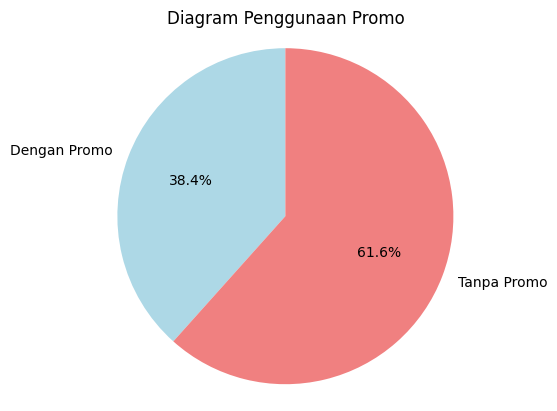

In [ ]:
# Perbandingan penggunaan promo

usepromo = (df_success['promo_code'] != 'NoCode').sum()
notusepromo = (df_success['promo_code'] == 'NoCode').sum()

labels = ['Dengan Promo', 'Tanpa Promo']
sizes = [usepromo, notusepromo]
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Diagram Penggunaan Promo')
plt.show()

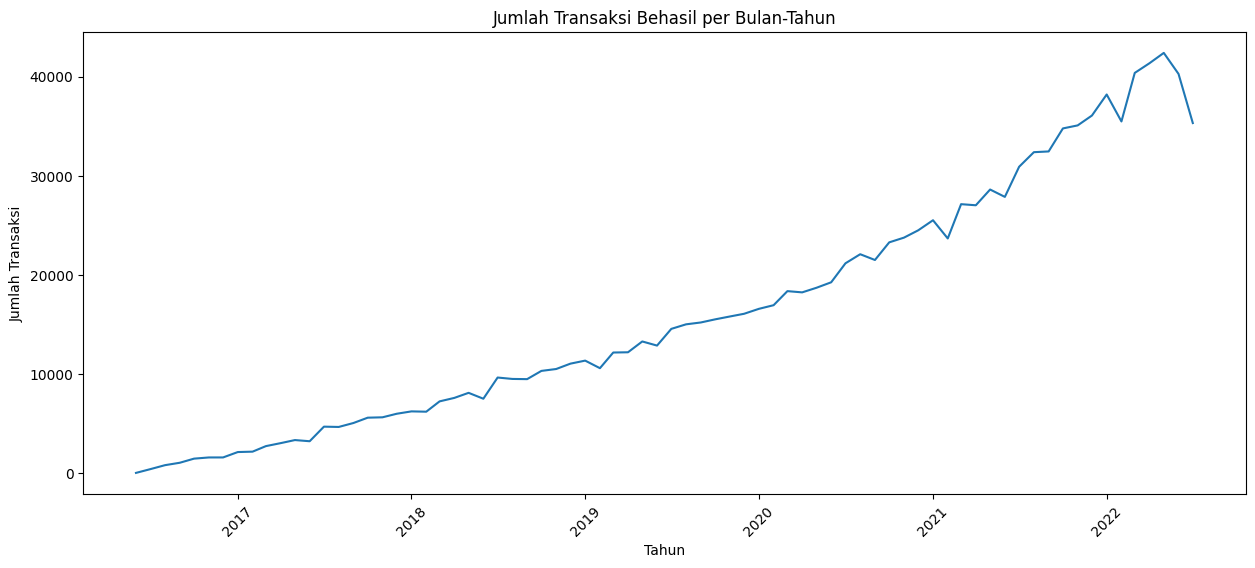

In [ ]:
# Jumlah transaksi berhasil berdasarkan bulan dan tahun

df_success['created_at'] = pd.to_datetime(df_success['created_at'])
df_success['year'] = df_success['created_at'].dt.year

df_month = df_success.copy()
df_month = df_success.groupby(['month', 'year'])['booking_id'].count().reset_index()
df_month['year_month'] = df_month['year'].astype(str) + '-' + df_month['month'].astype(str)
df_month['year_month'] = pd.to_datetime(df_month['year_month'])

# visualisasi
plt.figure(figsize=(15, 6))
sns.lineplot(x='year_month', y='booking_id', data=df_month, palette="viridis")
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Behasil per Bulan-Tahun')
plt.xticks(rotation=45)
plt.show()

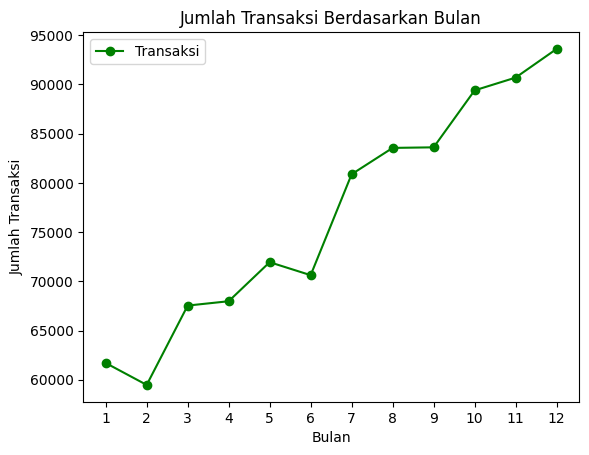

In [ ]:
filtered_df = df_success[(df_success['year'] > 2016) & (df_success['year'] < 2022)]
month = filtered_df.groupby('month')['booking_id'].count()

# visualisasi
ax = month.plot(kind='line', marker='o', color='g')
ax.set_xticks(month.index)
plt.legend(['Transaksi'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Berdasarkan Bulan')
plt.show()

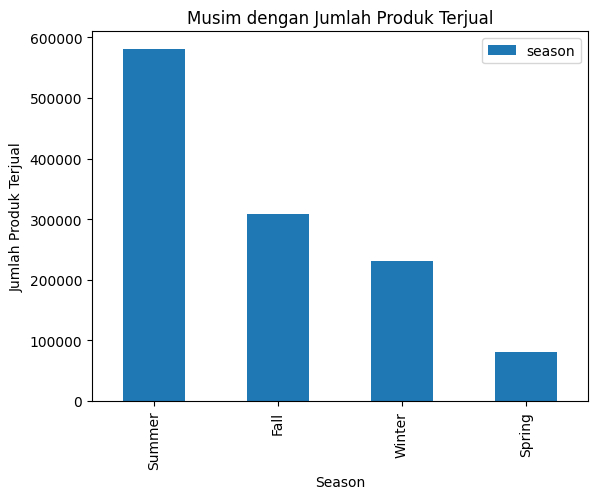

In [ ]:
# Jumlah produk terjual berdasarkan musim

jumlah_product = df_success['season'].value_counts()
jumlah_product.plot(kind='bar')
plt.legend()
plt.title('Musim dengan Jumlah Produk Terjual')
plt.xlabel('Season')
plt.ylabel('Jumlah Produk Terjual')
plt.show()

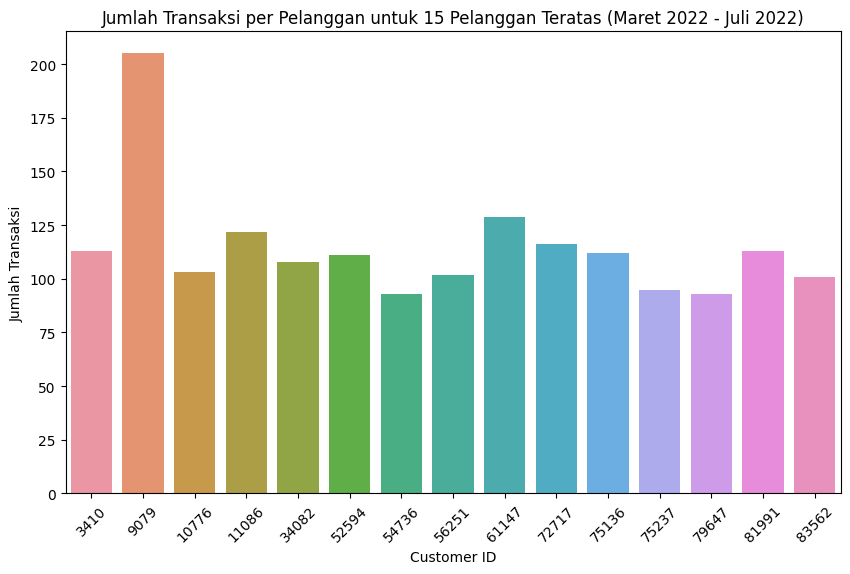

In [ ]:
# Jumlah Transaksi Per pelanggan untuk 15 pelanggan teratas bulan maret 2022-juli 2022

start_date = '2022-03-01'
end_date = '2022-07-31'
filtered_dfsuccess = df_success[(df_success['created_at'] >= start_date) & (df_success['created_at'] <= end_date)]
trans_counts = filtered_dfsuccess['customer_id'].value_counts().sort_index()
top_15_customers = trans_counts.nlargest(15)

# visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_customers.index, y=top_15_customers.values)
plt.xlabel('Customer ID')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Pelanggan untuk 15 Pelanggan Teratas (Maret 2022 - Juli 2022)')
plt.xticks(rotation=45)
plt.show()

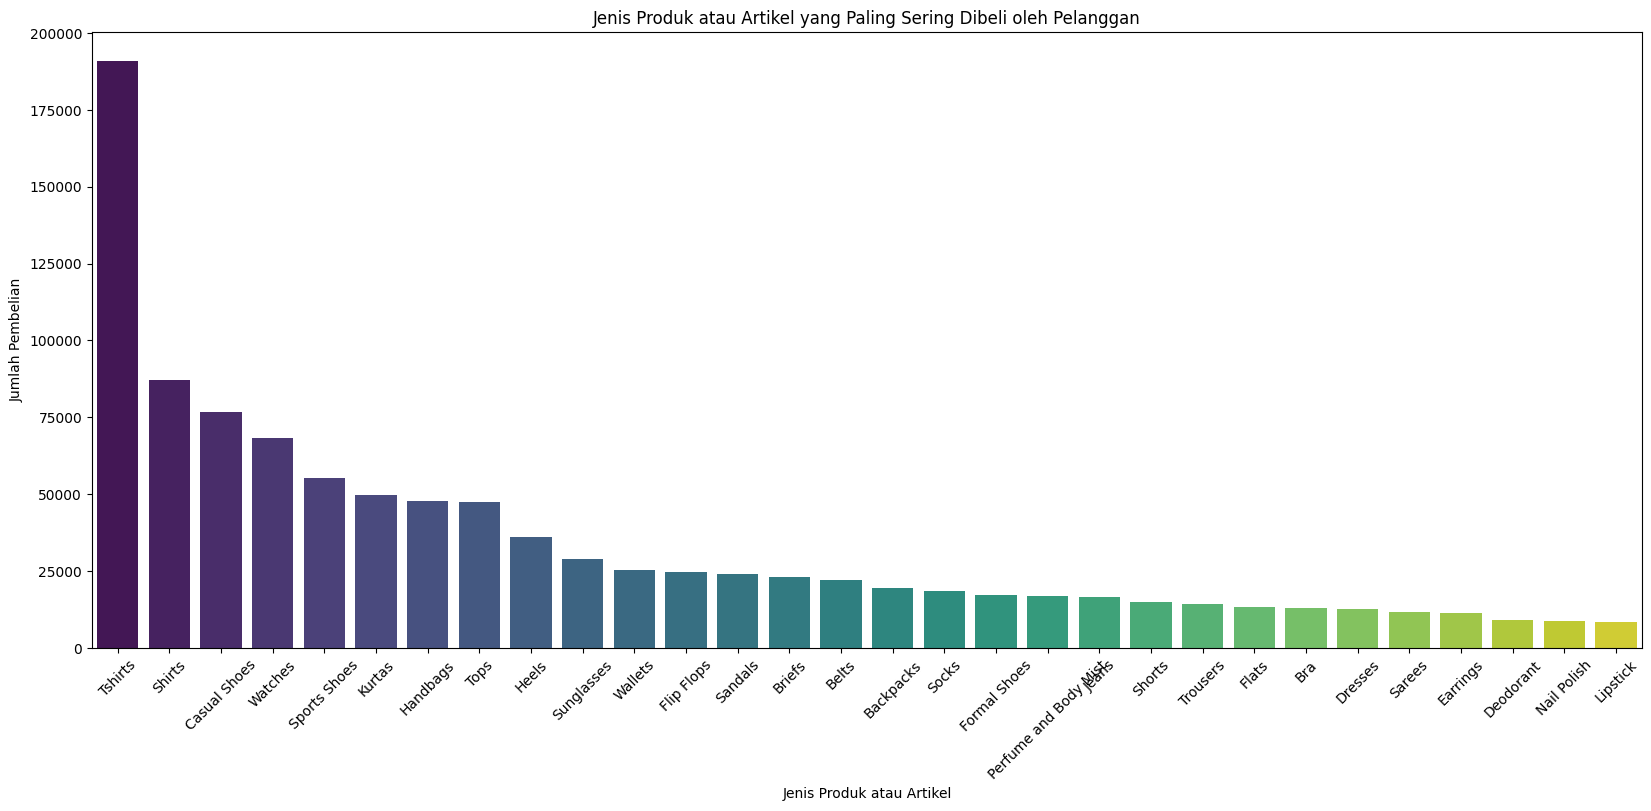

In [ ]:
# Jenis produk yang paling sering dibeli

frequent_product = df_success['articleType'].value_counts().head(30).reset_index()
frequent_product.columns = ['articleType', 'count']

# Visualisasikan data dengan Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='articleType', y='count', data=frequent_product, palette='viridis')
plt.xlabel('Jenis Produk atau Artikel')
plt.ylabel('Jumlah Pembelian')
plt.title('Jenis Produk atau Artikel yang Paling Sering Dibeli oleh Pelanggan')
plt.xticks(rotation=45)
plt.show()

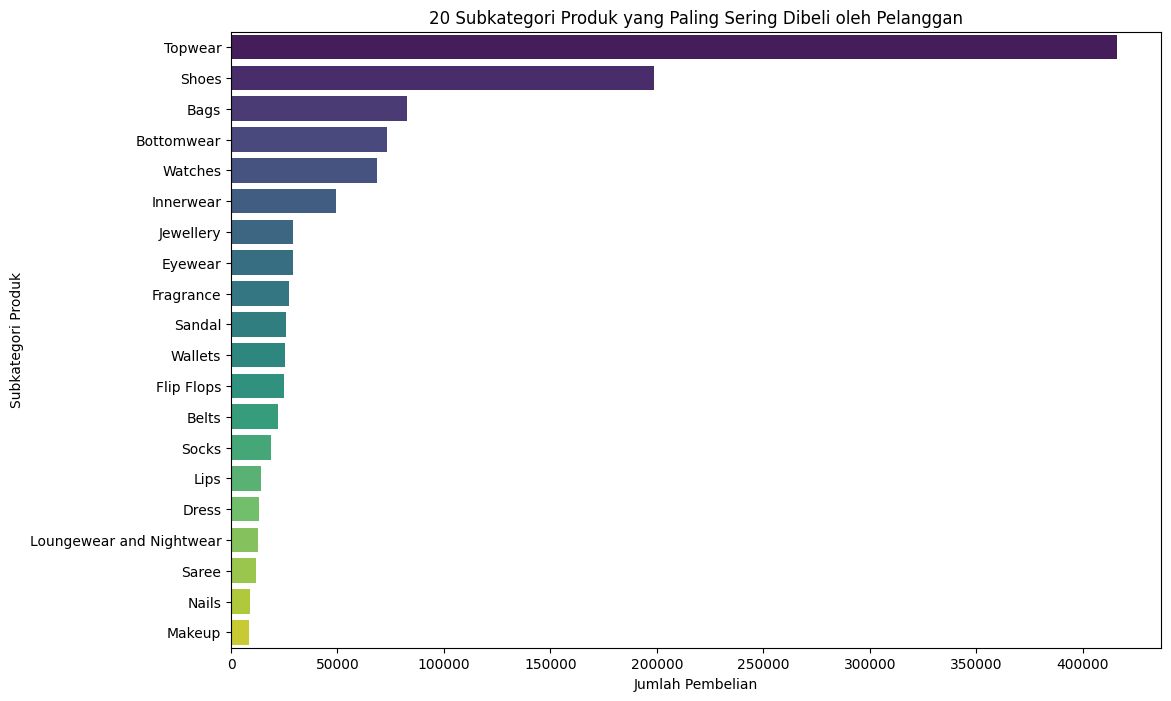

In [ ]:
# Subkategori produk yang paling sering dibeli

top_20_subcategories = df_success['subCategory'].value_counts().head(20).reset_index()
top_20_subcategories.columns = ['subCategory', 'count']

# Visualisasikan data dengan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='subCategory', data=top_20_subcategories, palette='viridis')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Subkategori Produk')
plt.title('20 Subkategori Produk yang Paling Sering Dibeli oleh Pelanggan')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
df_cast = df_success.copy()

# mengelompokkan revenue berdasarkan year-month
df_cast = df_cast[(df_cast['year'] >= 2016)].groupby(['year', 'month', 'masterCategory'])['revenue'].sum().reset_index()
df_cast['year_month'] = df_cast['year'].astype(str) + '-' + df_cast['month'].astype(str)
df_cast['year_month'] = pd.to_datetime(df_cast['year_month'])

# set index di dataframe
df_cast.set_index('year_month', inplace=True)
df_cast.drop(['year', 'month'], axis=1)

,masterCategory,revenue
year_month,,
2016-06-01,Apparel,630795
2016-07-01,Accessories,35516715
2016-07-01,Apparel,65149230
2016-07-01,Footwear,34184147
2016-07-01,Free Items,567543
2016-07-01,Personal Care,7848813
2016-08-01,Accessories,91330595
2016-08-01,Apparel,121438028
2016-08-01,Footwear,56449443


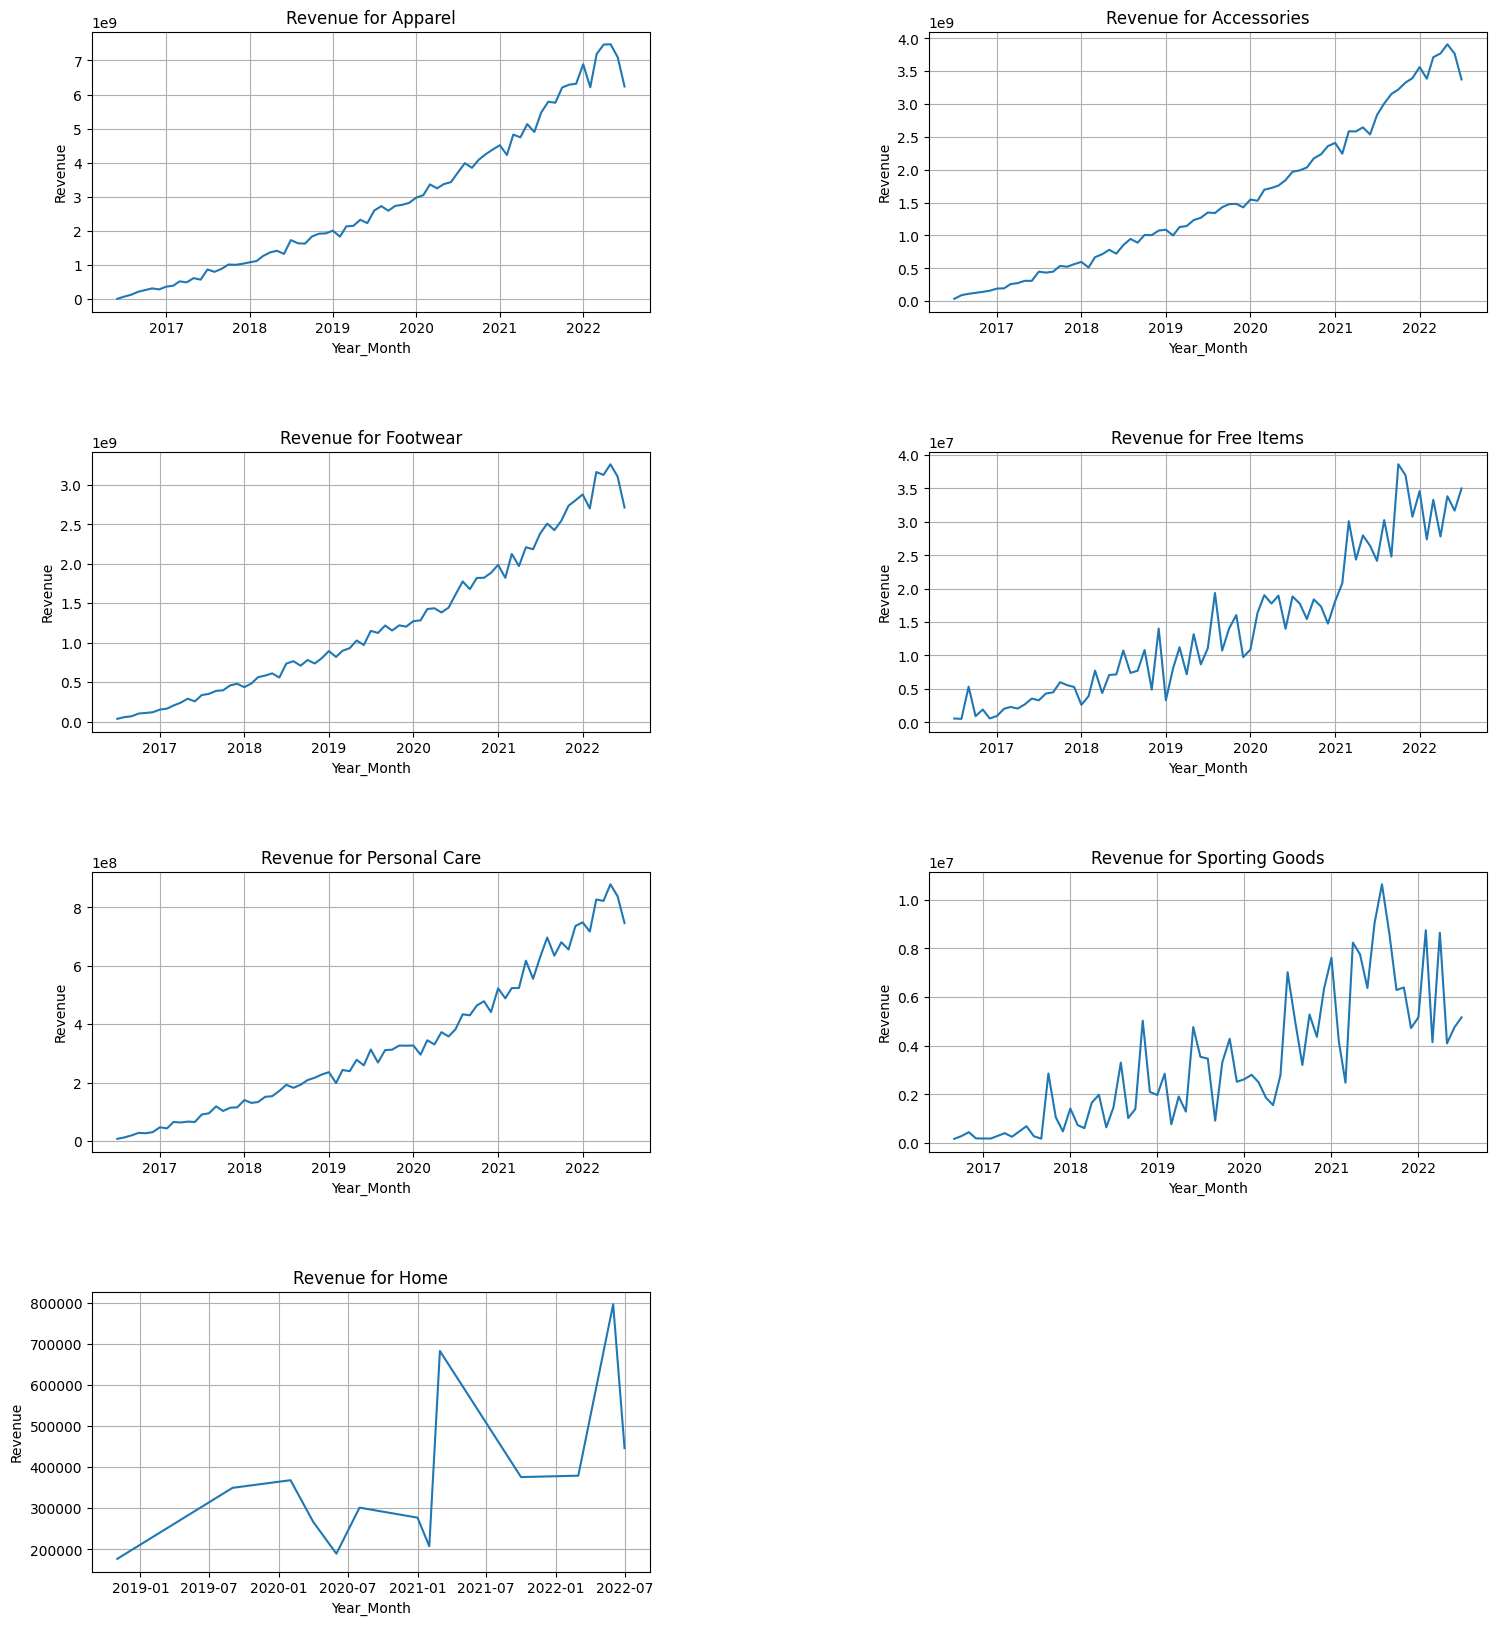

In [ ]:
df_cast1 = df_success.copy()

# grouping quantity based on year-month
df_cast1 = df_cast1.groupby(['year', 'month', 'masterCategory'])['revenue'].sum().reset_index()
df_cast1['year_month'] = df_cast1['year'].astype(str) + '-' + df_cast1['month'].astype(str)
df_cast1['year_month'] = pd.to_datetime(df_cast1['year_month'])

# set index in dataframe
df_cast1.set_index('year_month', inplace=True)

df_cast1.drop(['year', 'month'], axis=1, inplace=True)

# Mendapatkan daftar mastercategory unik
mastercategories2 = df_cast1['masterCategory'].unique()

# Set display option
pd.set_option('display.max_rows', None)

# Set plot
fig, ax = plt.subplots(4, 2, figsize=(18, 20))
plt.subplots_adjust(hspace = .5)
plt.subplots_adjust(wspace = .5)

# Visualisasi menggunakan for looping
for i, mastercategory2 in enumerate(mastercategories2):
    # Subset data untuk mastercategory tertentu
    subset_df = df_cast1[df_cast1['masterCategory'] == mastercategory2]

    # Plot
    sns.lineplot(x=subset_df.index, y='revenue', data=subset_df, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Revenue for {mastercategory2}')
    ax[i//2, i%2].set_xlabel('Year_Month')
    ax[i//2, i%2].set_ylabel('Revenue')
    ax[i//2, i%2].grid(True)

# Remove subplot
fig.delaxes(ax[3][1])

# Show figure
plt.show()

In [ ]:
df_cast1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447 entries, 2016-06-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   masterCategory  447 non-null    object
 1   revenue         447 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [ ]:
df_cast1.shape

(447, 2)

# Modeling

## Split Data

1 . Footwear 
    Data train : 57
    Data test  : 15


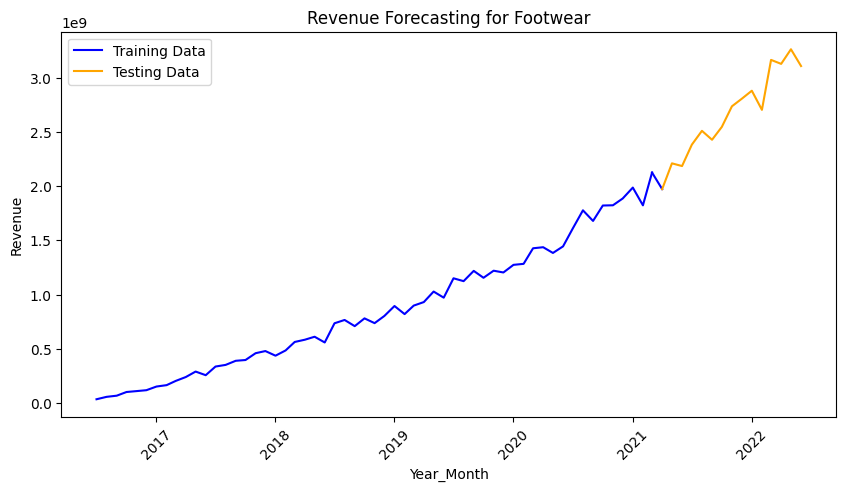



2 . Apparel 
    Data train : 57
    Data test  : 15


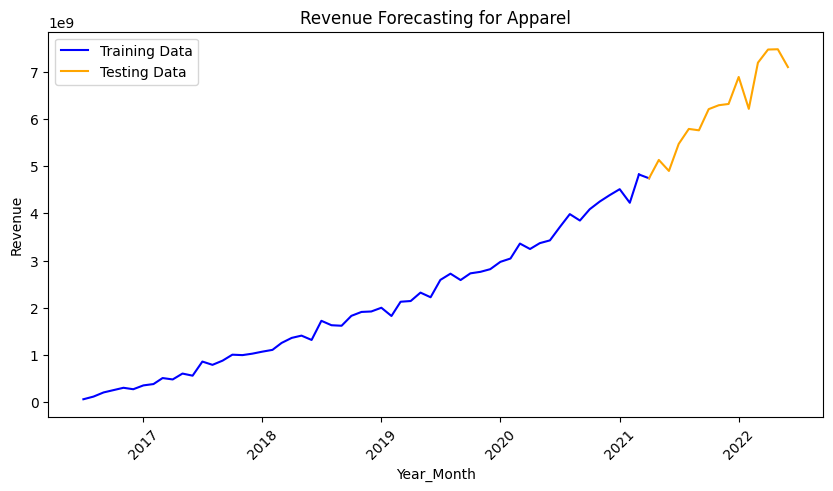



3 . Accessories 
    Data train : 57
    Data test  : 15


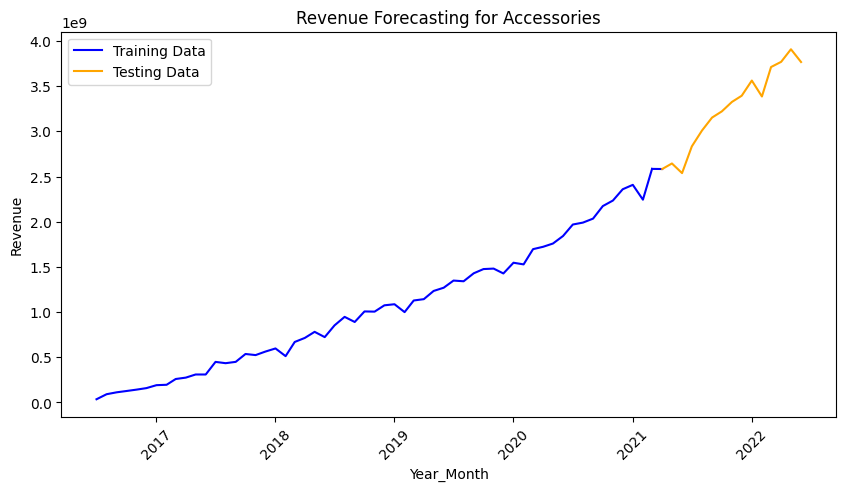



4 . Personal Care 
    Data train : 57
    Data test  : 15


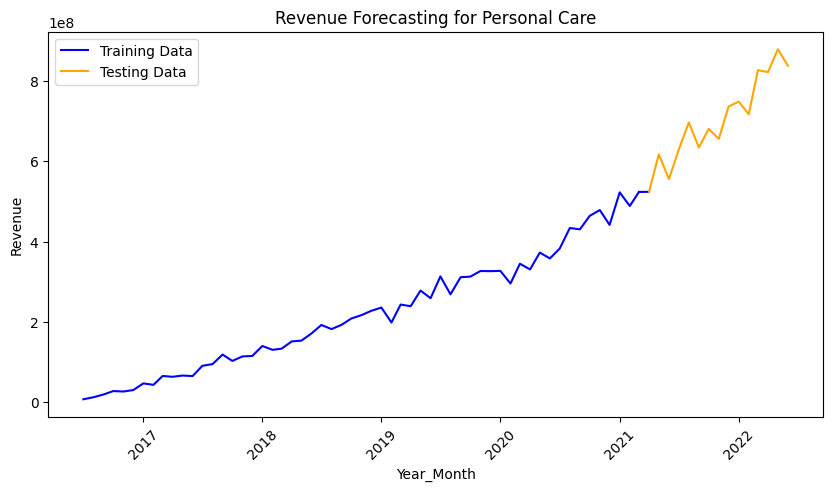



5 . Free Items 
    Data train : 57
    Data test  : 15


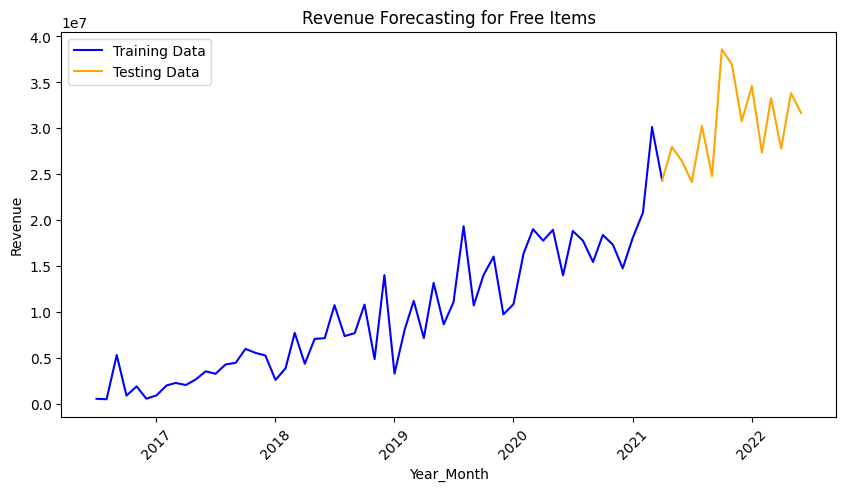

In [ ]:
master_categories = df_success['masterCategory'].unique()
df_dict = {}

# Create dictionaries to store train and test data for each master category
data_train = {}
train = {}
test = {}

for i, mastercategory in enumerate(master_categories):
    # Create a DataFrame for the current master category
    dfc = df_success.groupby(['year', 'month', 'masterCategory'])['revenue'].sum().reset_index()
    dfc['year_month'] = pd.to_datetime(dfc['year'].astype(str) + '-' + dfc['month'].astype(str))

    # Filter DataFrame based on the condition 'year_month' >= '2016-07'
    dfc = dfc[(dfc['year_month'] >= '2016-07') & (dfc['year_month'] <= '2022-06')]

    # Group by 'masterCategory' and sum 'revenue'
    dfc = dfc.groupby(['masterCategory', 'year_month'])['revenue'].sum().reset_index()

    # Set 'year_month' as the index
    dfc.set_index('year_month', inplace=True)

    # Filter DataFrame for the current master category
    df_dict[mastercategory] = dfc[dfc['masterCategory'] == mastercategory]['revenue']

    # If the master category is not 'Sporting Goods' or 'Home'
    if mastercategory not in ['Sporting Goods', 'Home']:
        # Calculate the index to split the data (80% train, 20% test)
        data_train[i] = int(len(df_dict[mastercategory]) * 0.8)


        # Split the data into training and testing sets
        train[i] = df_dict[mastercategory][:data_train[i]]
        test[i] = df_dict[mastercategory][data_train[i]:]
        line = df_dict[mastercategory][data_train[i]-1:data_train[i]+1]


        # Print information about the training and testing data (if needed)
        print((i+1), f". {mastercategory} ")
        print(f"    Data train :", len(train[i]))
        print(f"    Data test  :", len(test[i]))

        # Visualize training and testing data
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=train[i].index, y=train[i], label='Training Data', color='blue')
        sns.lineplot(x=line.index, y=line, color='blue')
        sns.lineplot(x=test[i].index, y=test[i], label='Testing Data', color='orange')
        plt.title(f'Revenue Forecasting for {mastercategory}')
        plt.xlabel('Year_Month')
        plt.ylabel('Revenue')
        plt.tick_params(axis='x', rotation=45)
        plt.legend()
        plt.show()
        print("\n")

## Triple Exponential Smoothing (Holt-Winters)

1 . Footwear 
     MAE:  158322604.19494388


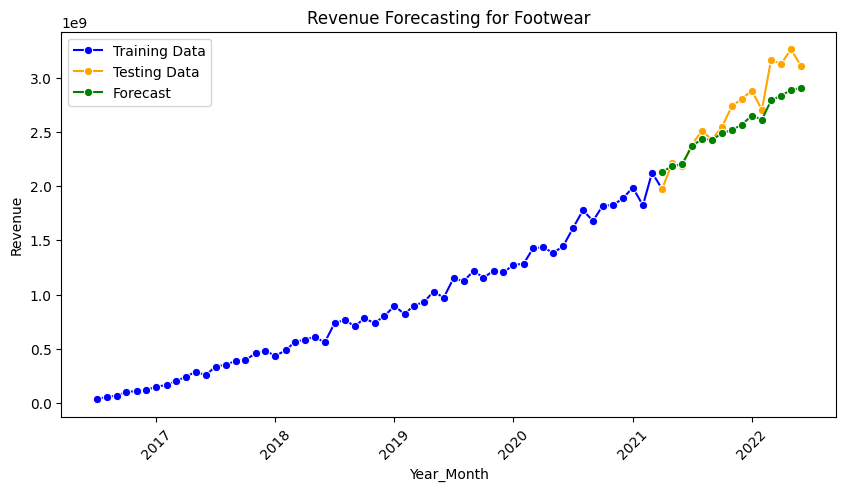



2 . Apparel 
     MAE:  508308059.57061553


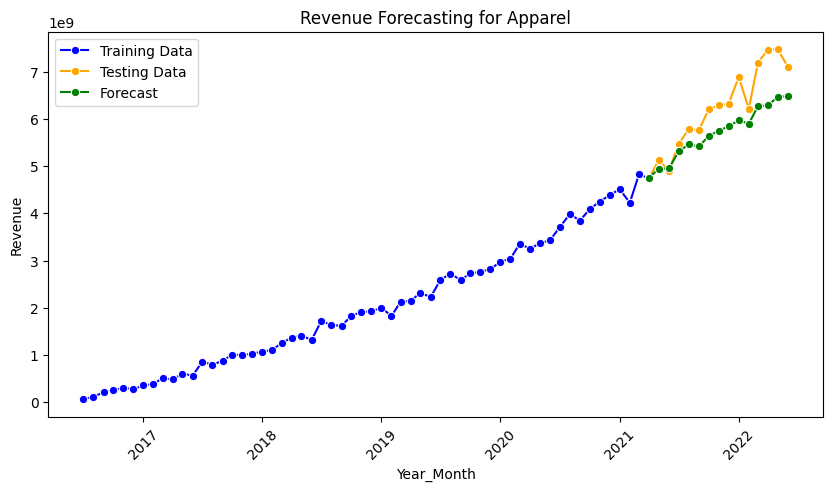



3 . Accessories 
     MAE:  136760487.9483901


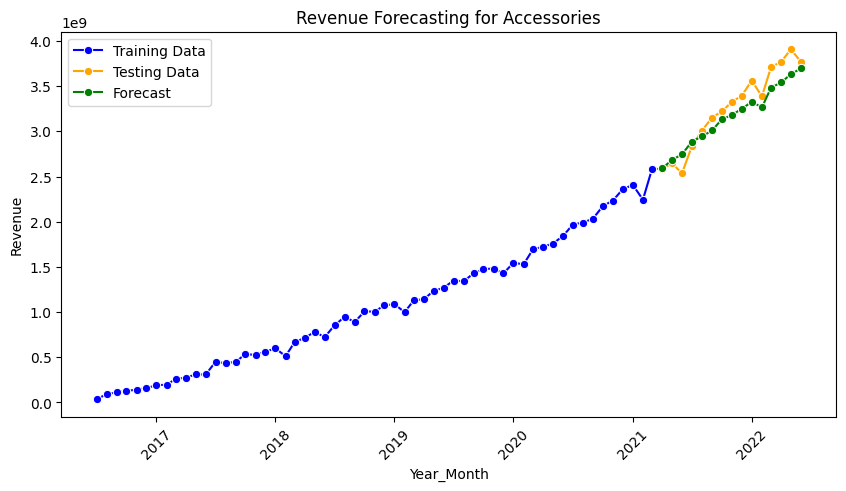



4 . Personal Care 
     MAE:  37943148.20558715


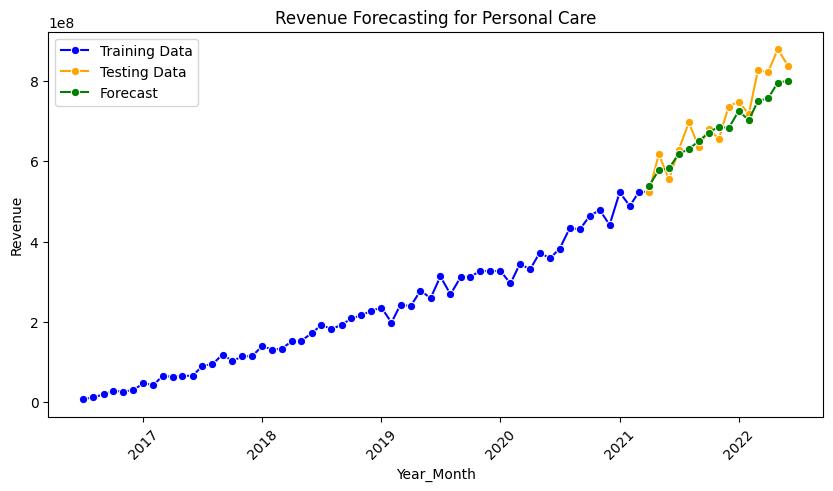



5 . Free Items 
     MAE:  4657016.8097633


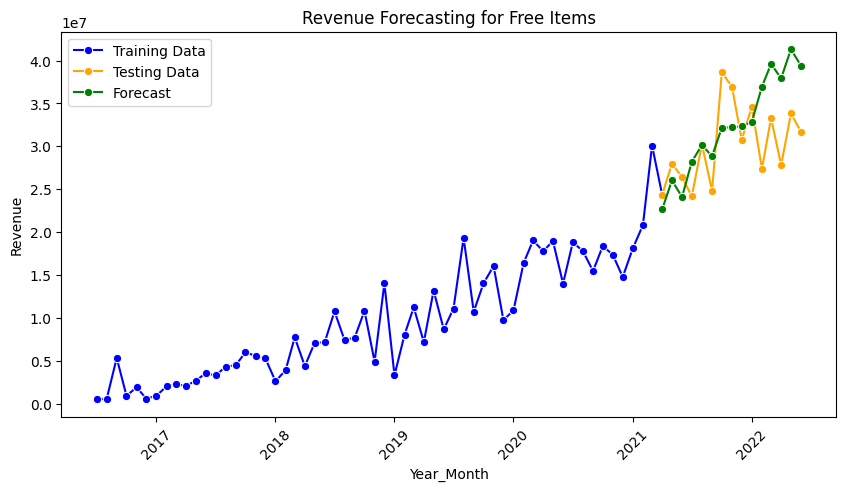

In [ ]:
for i, mastercategory in enumerate(master_categories):
    # If the master category is not 'Sporting Goods' or 'Home'
    if mastercategory not in ['Sporting Goods', 'Home']:
        # # Calculate the index to split the data (80% train, 20% test)
        data_train_index = int(len(df_dict[mastercategory]) * 0.8)

        # # Split the data into training and testing sets
        train = df_dict[mastercategory][:data_train_index]
        test = df_dict[mastercategory][data_train_index:]
        line = df_dict[mastercategory][data_train[i]-1:data_train[i]+1]

        # modelling
        tes_model = ExponentialSmoothing(train, trend='add', seasonal="add", seasonal_periods=12).\
                    fit(smoothing_level=0.3, smoothing_slope=0.3, smoothing_seasonal=0.3)

        y_pred = tes_model.forecast(len(test))

        # MAE for each masterCategory
        print((i+1), f". {mastercategory} ")
        print("     MAE: ", mean_absolute_error(test, y_pred))

        # Visualize training and testing data
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=train.index, y=train, label='Training Data', marker='o', color='blue')
        sns.lineplot(x=line.index, y=line, marker='o', color='blue')
        sns.lineplot(x=test.index, y=test, label='Testing Data', marker='o', color='orange')
        sns.lineplot(x=test.index, y=y_pred, label='Forecast', marker='o', color='green')
        plt.title(f'Revenue Forecasting for {mastercategory}')
        plt.xlabel('Year_Month')
        plt.ylabel('Revenue')
        plt.tick_params(axis='x', rotation=45)
        plt.legend()
        plt.show()
        print("\n")

## Hyperparameter Optimization for Triple Exponential Smoothing

In [ ]:
def tes_optimizer(train, abg, test, step):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")

    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12 ).\
                    fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae

    print("     best_alpha :", round(best_alpha, 2))
    print("     best_beta  :", round(best_beta, 2))
    print("     best_gamma :", round(best_gamma, 2))
    print("     best_mae   :", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

# Example of Triple Exponential Smoothing code and visualization for each master category
alphas = betas = gammas = np.arange(0.01, 1, 0.05)
abg = list(itertools.product(alphas, betas, gammas))

1 . Footwear 
     best_alpha : 0.61
     best_beta  : 0.76
     best_gamma : 0.36
     best_mae   : 65906084.4153
     R2         : 0.9571
     MAPE       : 2.47%


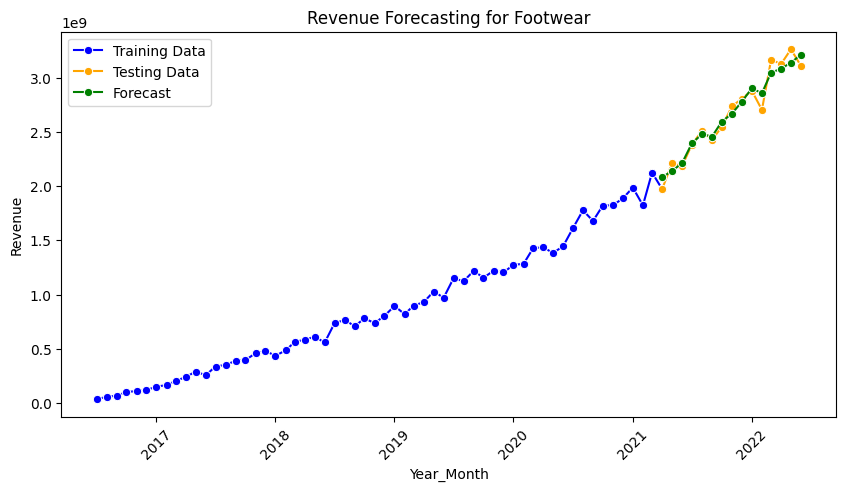



2 . Apparel 
     best_alpha : 0.81
     best_beta  : 0.91
     best_gamma : 0.41
     best_mae   : 140314945.4747
     R2         : 0.9429
     MAPE       : 2.21%


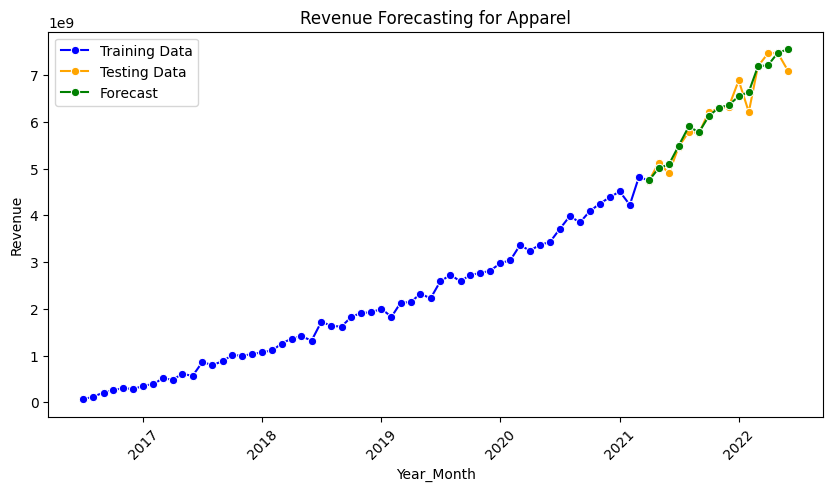



3 . Accessories 
     best_alpha : 0.06
     best_beta  : 0.86
     best_gamma : 0.16
     best_mae   : 58758853.1701
     R2         : 0.9612
     MAPE       : 1.90%


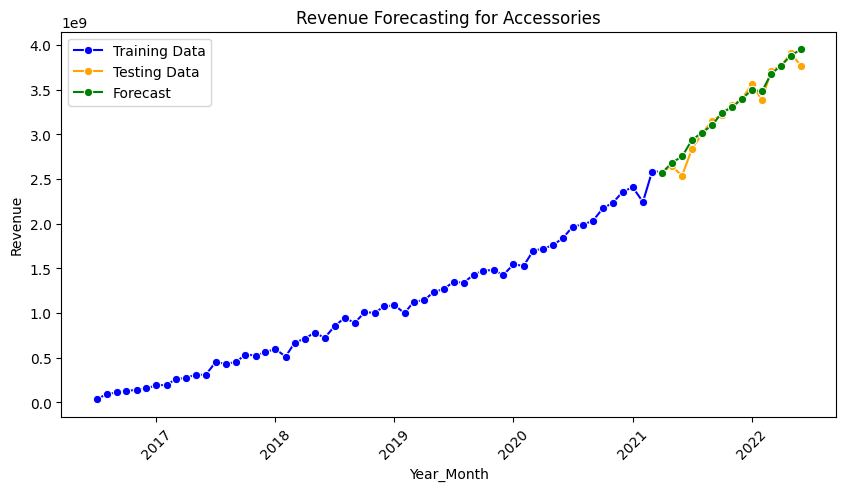



4 . Personal Care 
     best_alpha : 0.11
     best_beta  : 0.66
     best_gamma : 0.06
     best_mae   : 25558001.785
     R2         : 0.904
     MAPE       : 3.68%


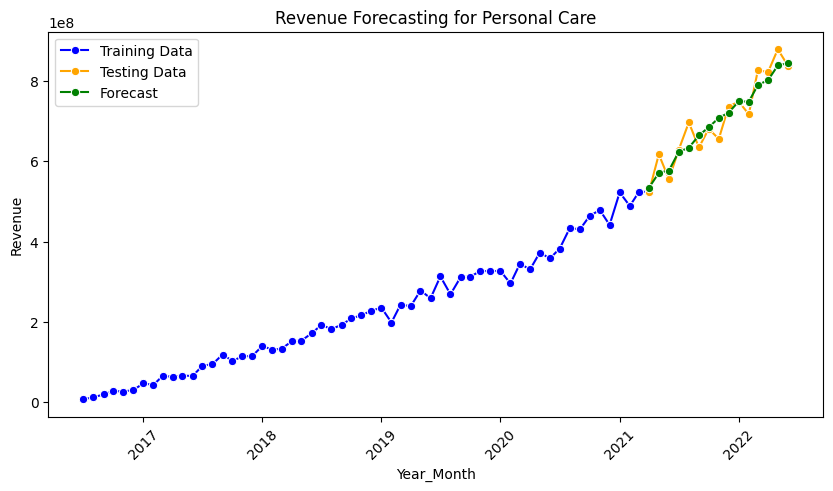



5 . Free Items 
     best_alpha : 0.71
     best_beta  : 0.01
     best_gamma : 0.26
     best_mae   : 2765793.756
     R2         : 0.2958
     MAPE       : 9.11%


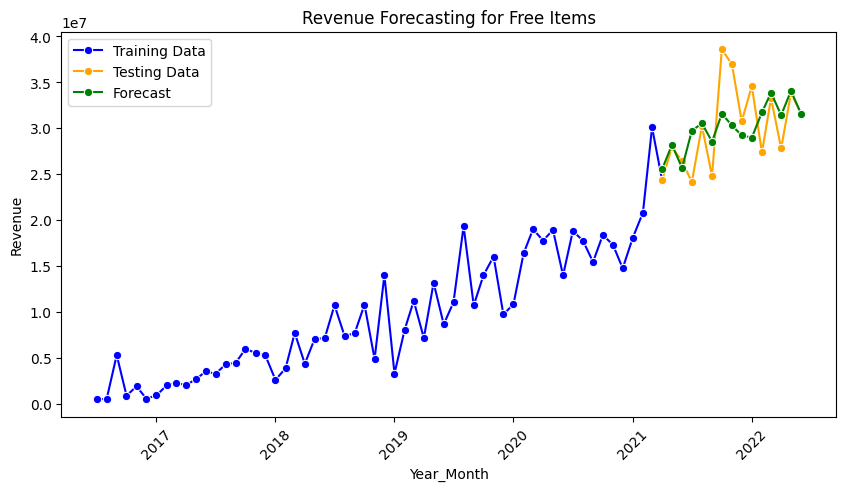

In [ ]:
# variable definition
best_alpha = {}
best_beta = {}
best_gamma = {}
best_mae = {}

for i, mastercategory in enumerate(master_categories):
    # If the master category is not 'Sporting Goods' or 'Home'
    if mastercategory not in ['Sporting Goods', 'Home']:
        # # Calculate the index to split the data (80% train, 20% test)
        data_train_index = int(len(df_dict[mastercategory]) * 0.8)

        # # Split the data into training and testing sets
        train = df_dict[mastercategory][:data_train_index]
        test = df_dict[mastercategory][data_train_index:]
        line = df_dict[mastercategory][data_train[i]-1:data_train[i]+1]

        # Print best params and MAE
        print((i+1), f". {mastercategory} ")
        best_alpha[i], best_beta[i], best_gamma[i], best_mae[i] = tes_optimizer(train, abg, test, step=15)

        # Model Triple Exponential Smoothing with the best parameters
        best_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
                         fit(smoothing_level=best_alpha[i], smoothing_slope=best_beta[i], smoothing_seasonal=best_gamma[i])

        # Forecasting on the testtest set
        y_pred = best_tes_model.forecast(len(test))
        r2 = r2_score(test, y_pred)
        mape = np.mean(np.abs((test - y_pred) / test)) * 100
        print("     R2         :", round(r2, 4))
        print(f"     MAPE       : {mape:.2f}%")

        # Visualize training and testing data
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=train.index, y=train, label='Training Data', marker='o', color='blue')
        sns.lineplot(x=line.index, y=line, marker='o', color='blue')
        sns.lineplot(x=test.index, y=test, label='Testing Data', marker='o', color='orange')
        sns.lineplot(x=test.index, y=y_pred, label='Forecast', marker='o', color='green')
        plt.title(f'Revenue Forecasting for {mastercategory}')
        plt.xlabel('Year_Month')
        plt.ylabel('Revenue')
        plt.tick_params(axis='x', rotation=45)
        plt.legend()
        plt.show()
        print("\n")

# Final Model

Berdasarkan hasil di atas, dapat diketahui bahwa model yang paling baik untuk diterapkan dalam memperkirakan pendapatan penjualan dengan nilai Mean Absolute Error (MAE) terkecil adalah model Triple Exponential Smoothing (Holt-Winters) dengan parameter sebagai berikut:




| MasterCategory | Parameter | MAE | R2 Score |MAPE|
|----------------|-----------|-----|-----------|----|
| Footware       | \(alpha = 0.61, beta = 0.76, gamma = 0.36\) | 65906084.4153 |0.9571|2.47%|
| Apparel        | \(alpha = 0.81, beta = 0.91, gamma = 0.41\) | 140314945.4747 |0.9429|2.21%|
| Accessories    | \(alpha = 0.06, beta = 0.86, gamma = 0.16\) | 58758853.1701 |0.9612|1.90%|
| Personal Care  | \(alpha = 0.11, beta = 0.66, gamma = 0.06\) | 25558001.785 |0.904|3.68%|
| Free Items     | \(alpha = 0.71, beta = 0.01, gamma = 0.26\) | 2666586.7248 |0.2958|9.11%|

**Prediksi *Sales Revenue* pada tahun berikutnya**

In [ ]:
for i, mastercategory in enumerate(master_categories):
    # If the master category is not 'Sporting Goods' or 'Home'
    if mastercategory not in ['Sporting Goods', 'Home']:

      print((i+1), f". {mastercategory} ")

      # model final
      tes_model_final = ExponentialSmoothing(df_dict[mastercategory], trend="add", seasonal="add", seasonal_periods=12).\
                        fit(smoothing_level=best_alpha[i], smoothing_slope=best_beta[i], smoothing_seasonal=best_gamma[i])

      # forecast (prediksi)
      final = tes_model_final.forecast(12)
      print(final, "\n")

1 . Footwear 
2022-07-01   3340892641
2022-08-01   3372193891
2022-09-01   3234539622
2022-10-01   3309548078
2022-11-01   3371024675
2022-12-01   3350145956
2023-01-01   3367785313
2023-02-01   3203363148
2023-03-01   3502287992
2023-04-01   3299354202
2023-05-01   3342187648
2023-06-01   3313995368
Freq: MS, dtype: float64 

2 . Apparel 
2022-07-01   7584119481
2022-08-01   7594122415
2022-09-01   7278395250
2022-10-01   7359224951
2022-11-01   7179730083
2022-12-01   7015902366
2023-01-01   7123982209
2023-02-01   6437438915
2023-03-01   7582524484
2023-04-01   7212093287
2023-05-01   6731329761
2023-06-01   6562158747
Freq: MS, dtype: float64 

3 . Accessories 
2022-07-01   4108787466
2022-08-01   4219353448
2022-09-01   4321078630
2022-10-01   4462529037
2022-11-01   4545703062
2022-12-01   4645085853
2023-01-01   4771948679
2023-02-01   4728204662
2023-03-01   4973725308
2023-04-01   5049871625
2023-05-01   5169645027
2023-06-01   5219411801
Freq: MS, dtype: float64 

4 . Persona